# Model regresji prostej

$$Y = \beta_0 + \beta_1 X + \epsilon,$$
gdzie $\epsilon \sim \mathcal{N}(0, \sigma)$.

**Nomenklatura:**

$Y$ - zmienna zależna, zmienna odpowiedzi, zmienna objaśniana

$X$ - zmienna niezależna, predyktor, atrybut

$\beta_0, \beta_1$ - współczynniki regregresji

$\epsilon$ - błąd losowy

**Cel:**

Przy użyciu par  $(x_1, y_1), (x_2, y_2), \ldots (x_n, y_n)$ odpowiadającym pomiarom, odpowiednio,
zmiennej niezależnej $X$ i zmiennej zależnej $Y$, wyznaczyć współczynniki
$b_0, b_1$ tak, aby
$$y_i \approx b_0 + b_1 x_i$$

**Suma błędów  kwadratów:**
    
$$RSS = e_1^2 + e_2^2 + \ldots + e_n^2 = (y_1 - \hat{y_1})^2 + (y_2 - \hat{y_2})^2 + \ldots + (y_n - \hat{y_n})^2$$

**Funkcja kryterialna:**
    
$$(b_0, b_1) = \arg\!\min_{(b_0, b_1)} \sum_{i=1}^n (y_i - \hat{y_i})^2 = \arg\!\min_{(b_0, b_1)} \sum_{i=1}^n (y_i - (b_0 + b_1 x_i))^2$$

$$b_0 = \frac{\sum_{i=1}^{n}(x_i - \overline{x})(y_i - \overline{y})}{\sum_{i=1}^n(x_i - \overline{x})^2}$$

$$b_1 = \overline{y} - b_1\overline{x}$$

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# statsmodels - wywolanie sporej ilosci zbiorow danych, ma polaczenie z zbiorami z programu R
import statsmodels.api as sm 
from scipy import stats
#sklearn - do uczenia mszynowego
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

## Pakiet [`statsmodels`](https://www.statsmodels.org/stable/genindex.html)

In [2]:
help(sm.datasets)

Help on package statsmodels.datasets in statsmodels:

NAME
    statsmodels.datasets - Datasets module

PACKAGE CONTENTS
    anes96 (package)
    cancer (package)
    ccard (package)
    china_smoking (package)
    co2 (package)
    committee (package)
    copper (package)
    cpunish (package)
    danish_data (package)
    elec_equip (package)
    elnino (package)
    engel (package)
    fair (package)
    fertility (package)
    grunfeld (package)
    heart (package)
    interest_inflation (package)
    longley (package)
    macrodata (package)
    modechoice (package)
    nile (package)
    randhie (package)
    scotland (package)
    spector (package)
    stackloss (package)
    star98 (package)
    statecrime (package)
    strikes (package)
    sunspots (package)
    template_data
    tests (package)
    utils

FUNCTIONS
    check_internet(url=None)
        Check if internet is available

    clear_data_home(data_home=None)
        Delete all the content of the data home cache.

  

In [3]:
#pobieranie plików z statsmodels
cancer = sm.datasets.cancer.load_pandas()

In [4]:
print(sm.datasets.cancer.DESCRSHORT)
print(sm.datasets.cancer.DESCRLONG)
print(sm.datasets.cancer.NOTE)

Breast Cancer and county population
The number of breast cancer observances in various counties
::

    Number of observations: 301
    Number of variables: 2
    Variable name definitions:

        cancer - The number of breast cancer observances
        population - The population of the county




In [5]:
cancer.data.head()

,cancer,population
0,1.0,445.0
1,0.0,559.0
2,3.0,677.0
3,4.0,681.0
4,3.0,746.0


In [ ]:
# Pobieranie zbiorow danych z R

In [6]:
carseats = sm.datasets.get_rdataset(dataname="Carseats", package="ISLR", cache=True)

In [7]:
#opis
print(carseats.__doc__)

.. container::

   .. container::

      ======== ===============
      Carseats R Documentation
      ======== ===============

      .. rubric:: Sales of Child Car Seats
         :name: sales-of-child-car-seats

      .. rubric:: Description
         :name: description

      A simulated data set containing sales of child car seats at 400
      different stores.

      .. rubric:: Usage
         :name: usage

      .. code:: R

         Carseats

      .. rubric:: Format
         :name: format

      A data frame with 400 observations on the following 11 variables.

      ``Sales``
         Unit sales (in thousands) at each location

      ``CompPrice``
         Price charged by competitor at each location

      ``Income``
         Community income level (in thousands of dollars)

      ``Advertising``
         Local advertising budget for company at each location (in
         thousands of dollars)

      ``Population``
         Population size in region (in thousands)

      ``Pric

# Zadanie 1

Wczytaj zbiór `Carseats`, który zawierają dane o sprzedaży fotelików samochodowych pewnej firmy w 400 różnych lokalizacjach:

• sprzedaż jednostek (w tysiącach) w danej lokalizacji (`Sales`),

• cena sprzedaży konkurenta w danej lokalizacji (`CompPrice`),

• poziom dochodów społeczności wdanej lokalizacji w tys. dolarów (`Income`),

• wielkość populacji w danym regionie (`Population`),

• lokalny budżet reklamowy dla firmy w danej lokalizacji (`Advertising`),

• cena sprzedaży w danej lokalizacji (`Price`),

• na ile korzystne jest miejsce na półkach sklepu dla fotelików w danym regionie?
(`Shelveloc`),

• średni wiek ludności lokalnej (`Age`),

• poziom wykształcenia w każdej lokalizacji (`Education`),

• czy położenie sklepu jest w lokalizacji miejskiej? (`Urban`)

• czy sklep znajduje się w USA? (`US`)

1. Interesuje nas zależność wielkości sprzedaży fotelików samochodowych (w tys. jednostek) od ich ceny sprzedaży (zmienne `Sales` i `Price`). Określ zmienną zależną i niezależną, a następnie:
* Narysuj wykres rozproszenia tych zmiennych.
* Czy zmienne te są zależne?
* Oblicz dla nich współczynnik korelacji Pearsona.
       
2. Wyznacz funkcję regresji wielkości sprzedaży fotelików względem ich ceny. Narysuj ją na wykresie rozproszenia.

3. Oblicz i zinterpretuj wartość współczynnika determinacji R2.
       
4. Powtórz punkty 1-3 dla zależności wielkości sprzedaży fotelików samochodowych (w tys. jednostek) od ich ceny sprzedaży u konkurenta w danej lokalizacji (zmienne `Sales` i `CompPrice`).

In [8]:
carseats_df = carseats.data

In [9]:
#zmienna objaśniająca i objaśniana
X, y = carseats_df.iloc[:, carseats_df.columns != 'Sales'], carseats_df['Sales']

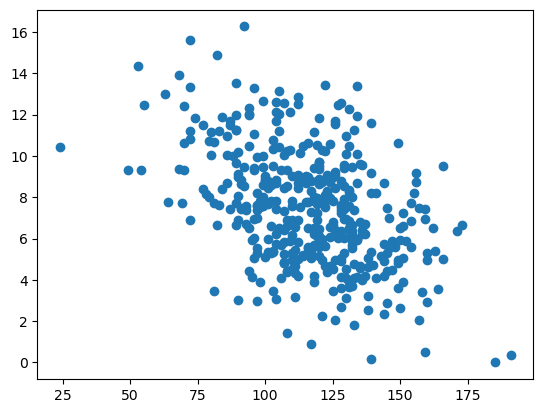

In [10]:
#1
#Zależna Sales, niezależna Price
x = X['Price']
plt.scatter(x,y)

In [ ]:
# im wieksza cena za fotelik tym sprzedaz maleje
# regresja liniowa jest

In [11]:
# korelacja pearsonowska
np.corrcoef(x,y)[0,1]

-0.4449507278465725

In [ ]:
# powyzszy wspolczynnik - calkiem wysoki wyszedl

### Wykres rozproszenia $x$ vs. $y$ z wyznaczoną przez model prostą regresji $y=13.6419 - 0.0531 \cdot x$

In [15]:
np.array(x)

array([120,  83,  80,  97, 128,  72, 108, 120, 124, 124, 100,  94, 136,
        86, 118, 144, 110, 131,  68, 121, 131, 109, 138, 109, 113,  82,
       131, 107,  97, 102,  89, 131, 137, 128, 128,  96, 100, 110, 102,
       138, 126, 124,  24, 134,  95, 135,  70, 108,  98, 149, 108, 108,
       129, 119, 144, 154,  84, 117, 103, 114, 123, 107, 133, 101, 104,
       128,  91, 115, 134,  99,  99, 150, 116, 104, 136,  92,  70,  89,
       145,  90,  79, 128, 139,  94, 121, 112, 134, 126, 111, 119, 103,
       107, 125, 104,  84, 148, 132, 129, 127, 107, 106, 118,  97,  96,
       138,  97, 139, 108, 103,  90, 116, 151, 125, 127, 106, 129, 128,
       119,  99, 128, 131,  87, 108, 155, 120,  49, 133, 116, 126, 147,
        77,  94, 136,  97, 131, 120, 120, 118, 109,  94, 129, 131, 104,
       159, 123, 117, 131, 119,  97,  87, 114, 103, 128, 150, 110,  69,
       157,  90, 112,  70, 111, 160, 149, 106, 141, 191, 137,  93, 117,
        77, 118,  55, 110, 128, 185, 122, 154,  94,  81, 116, 14

In [13]:
#chcemy aby x był 2 wymiarowym arrayem z jedną kolumną
x1 = np.array(x).reshape(-1,1)
x1

array([[120],
       [ 83],
       [ 80],
       [ 97],
       [128],
       [ 72],
       [108],
       [120],
       [124],
       [124],
       [100],
       [ 94],
       [136],
       [ 86],
       [118],
       [144],
       [110],
       [131],
       [ 68],
       [121],
       [131],
       [109],
       [138],
       [109],
       [113],
       [ 82],
       [131],
       [107],
       [ 97],
       [102],
       [ 89],
       [131],
       [137],
       [128],
       [128],
       [ 96],
       [100],
       [110],
       [102],
       [138],
       [126],
       [124],
       [ 24],
       [134],
       [ 95],
       [135],
       [ 70],
       [108],
       [ 98],
       [149],
       [108],
       [108],
       [129],
       [119],
       [144],
       [154],
       [ 84],
       [117],
       [103],
       [114],
       [123],
       [107],
       [133],
       [101],
       [104],
       [128],
       [ 91],
       [115],
       [134],
       [ 99],
       [ 99],
      

In [16]:
#definicja modelu liniowego
lm1 = LinearRegression()
#funkcja fit ma za zadanie dopasowywać model do odpowiednich danych
lm1.fit(X = x1, y = y)

LinearRegression()

In [17]:
#współczynniki modelu liniowego (bez wyrazu wolnego)
lm1.coef_
# b1
# jesli dany parametr wywolywany jest z podkreslnikiem, to dojscie do niego jest dopiero wtedy
# gdy zostal wczesniej wywolany fit na konkretnych danych

array([-0.05307302])

In [18]:
#wyraz wolny - b0
lm1.intercept_

13.641915176780913

In [19]:
#funkcja licząca przewidywania na zadanym zbiorze, w naszym przypadku na obserwacjach, na których uczyliśmy model
lm1.predict(x1)

array([ 7.27315296,  9.23685464,  9.3960737 ,  8.49383238,  6.84856881,
        9.82065785,  7.91002918,  7.27315296,  7.06086088,  7.06086088,
        8.33461333,  8.65305144,  6.42398466,  9.07763559,  7.37929899,
        5.99940051,  7.80388314,  6.68934975, 10.03294992,  7.22007994,
        6.68934975,  7.85695616,  6.31783862,  7.85695616,  7.64466409,
        9.28992766,  6.68934975,  7.9631022 ,  8.49383238,  8.22846729,
        8.91841653,  6.68934975,  6.37091164,  6.84856881,  6.84856881,
        8.5469054 ,  8.33461333,  7.80388314,  8.22846729,  6.31783862,
        6.95471485,  7.06086088, 12.36816273,  6.5301307 ,  8.59997842,
        6.47705768,  9.92680388,  7.91002918,  8.44075936,  5.73403542,
        7.91002918,  7.91002918,  6.79549579,  7.32622598,  5.99940051,
        5.46867033,  9.18378162,  7.43237201,  8.17539427,  7.59159107,
        7.1139339 ,  7.9631022 ,  6.58320372,  8.28154031,  8.12232125,
        6.84856881,  8.81227049,  7.53851805,  6.5301307 ,  8.38

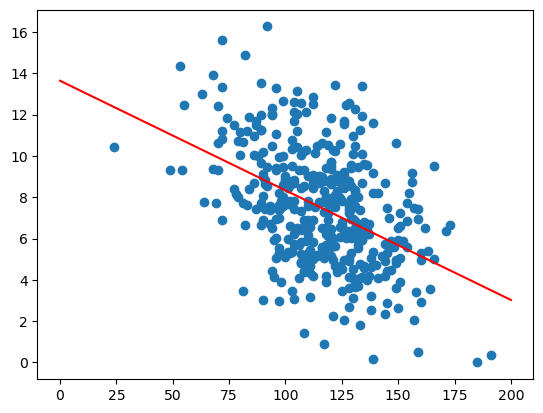

In [20]:
#2
plt.scatter(x,y)
X_plot = np.linspace(0,200,200)
plt.plot(X_plot,X_plot*lm1.coef_+lm1.intercept_,color = 'red')
plt.show()

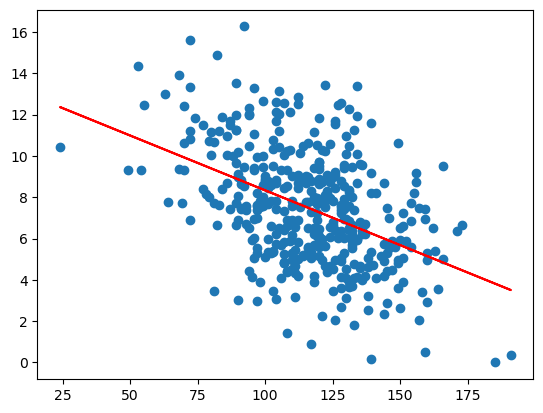

In [21]:
#inaczej
plt.scatter(x,y)
plt.plot(x,x*lm1.coef_+lm1.intercept_,color = 'red')

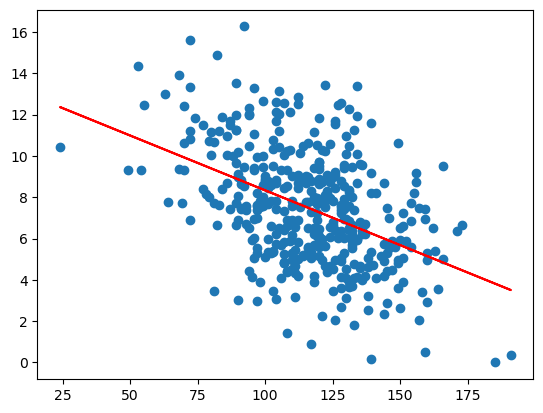

In [22]:
#jeszcze inaczej
plt.scatter(x,y)
plt.plot(x,lm1.predict(x1),color = 'red')
#bo predykcje to nic innego jak \hat{y}=x*\hat{beta}_1+\hat{beta}_0

In [23]:
#R^2
# tutaj wyszlo 0.2, jest to dosc niska wartosc
# 0.75 wzwyz to wysoki R^2
lm1.score(x1,y)

0.19798115021119478

In [24]:
np.corrcoef(x,y)[0,1]**2 #w modelach z jedną zmienną R^2 to korelacja pearsonowska do kwadratu stąd nazwa
# ale tylko z jedna zmienna to dziala w ten sposob!

0.19798115021119464

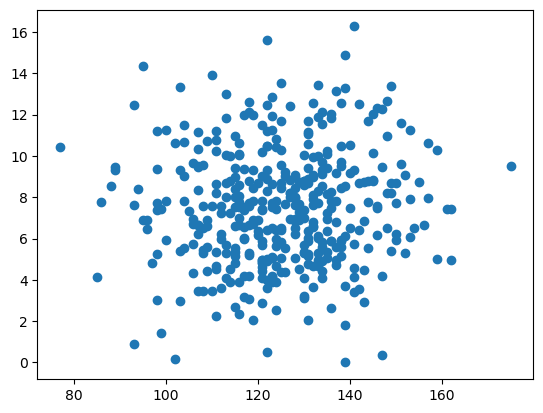

In [26]:
#4 Powtarzamy dla zmiennej Sales i CompPrice
#Zależna Sales, niezależna CompPrice
x = X['CompPrice']
plt.scatter(x,y)

In [ ]:
# nie ma za bardzo zaleznosci, wyglada na losowa chumre punktow

In [27]:
# korelacja pearsonowska - wyszla bardzo niska korelacja
np.corrcoef(x,y)[0,1]

0.06407872955062155

In [29]:
#chcemy aby x był 2 wymiarowym arrayem z jedną kolumną
x1 = np.array(x).reshape(-1,1)

In [30]:
#definicja modelu liniowego
lm1 = LinearRegression()
#funkcja fit ma za zadanie dopasowywać model do odpowiednich danych
lm1.fit(X = x1, y = y)

LinearRegression()

In [31]:
#współczynniki modelu liniowego (bez wyrazu wolnego)
lm1.coef_

array([0.0118012])

In [32]:
#wyraz wolny - b0
lm1.intercept_

6.02146948187426

In [33]:
#funkcja licząca przewidywania na zadanym zbiorze, w naszym przypadku na obserwacjach, na których uczyliśmy model
lm1.predict(x1)

array([7.65003569, 7.33140317, 7.35500558, 7.4022104 , 7.6854393 ,
       7.48481883, 7.37860799, 7.62643328, 7.57922846, 7.57922846,
       7.44941521, 7.4022104 , 7.46121642, 7.37860799, 7.28419835,
       7.77984894, 7.4140116 , 7.75624653, 7.31960196, 7.54382485,
       7.49662003, 7.60283087, 7.53202364, 7.44941521, 7.73264412,
       7.66183689, 7.28419835, 7.17798751, 7.23699353, 7.24879474,
       7.49662003, 7.62643328, 7.28419835, 7.36680678, 7.37860799,
       7.56742726, 7.46121642, 7.44941521, 7.30780076, 7.55562605,
       7.4258128 , 7.87425857, 6.93016222, 7.47301762, 7.02457185,
       7.6854393 , 7.52022244, 7.50842123, 7.39040919, 7.87425857,
       7.18978872, 7.44941521, 7.82705375, 7.30780076, 7.60283087,
       7.70904171, 7.59102967, 7.11898149, 7.23699353, 7.4140116 ,
       7.46121642, 7.26059594, 7.66183689, 7.4258128 , 7.20158992,
       7.46121642, 7.52022244, 7.50842123, 7.77984894, 7.52022244,
       7.07177667, 7.76804773, 7.37860799, 7.4140116 , 7.79165

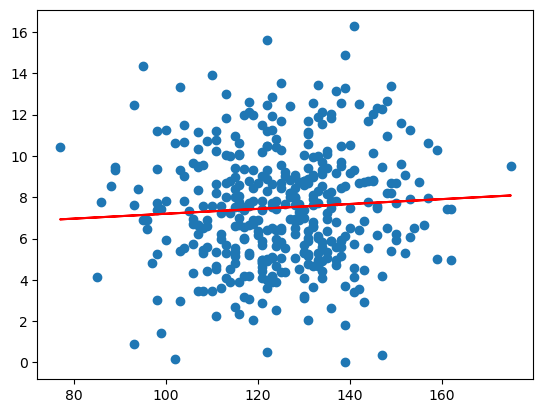

In [34]:
# wykres
plt.scatter(x,y)
plt.plot(x,lm1.predict(x1),color = 'red')


In [35]:
#R^2
lm1.score(x1,y)

0.004106083580821762

In [ ]:
# prosta wyszla dosc plaska, idzie bardzo powoli do gory
# nie ma zaleznosci miedzy x a y 
# jesli wspolczynnik prostej b1 jest 'zerowy' - bliski zeru, bardzo maly 
# to nie ma w modelu zmiennej x, czyli nie ma tej zaleznosci

# Przekształcanie zmiennej objaśniającej

# Zadanie 2
Wczytaj dane `pollution.csv` (opis danych: https://www.rdocumentation.org/packages/SMPracticals/versions/1.4-3/topics/pollution). Dopasuj model regresji liniowej postaci: `mort~nox`. Czy model jest dobrze dopasowany do danych? Jeżeli nie, dlaczego?

In [40]:
#https://www.rdocumentation.org/packages/SMPracticals/versions/1.4-3/topics/pollution
pollution = pd.read_csv("pollution.csv")
x = pollution['nox'] # stezenie tlenku azotu
x1 = np.array(x).reshape(-1,1)
y = pollution['mort']
lm1=LinearRegression()
lm1.fit(x1,y)
lm1.score(x1,y)
#kiepskie R^2 nie ma zależności

0.0059874342734173025

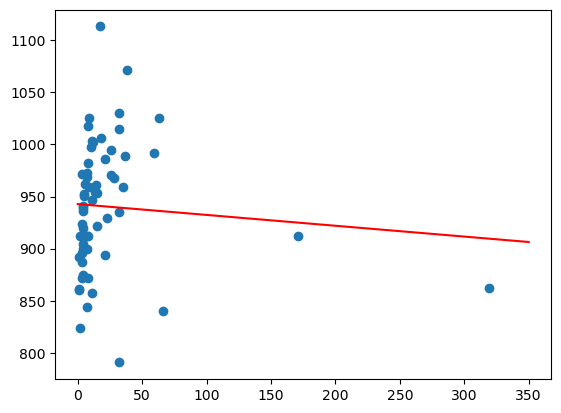

In [41]:
plt.scatter(x,y)
X_plot = np.linspace(0,350,350)
plt.plot(X_plot,X_plot*lm1.coef_+lm1.intercept_,color = 'red')
plt.show()
#brak zależności liniowej

(array([52.,  5.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([  1. ,  32.8,  64.6,  96.4, 128.2, 160. , 191.8, 223.6, 255.4,
        287.2, 319. ]),
 <BarContainer object of 10 artists>)

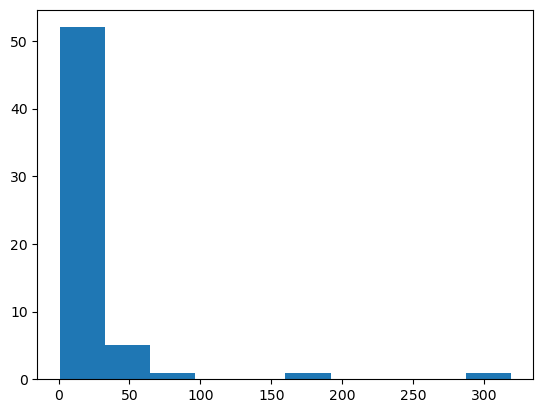

In [42]:
plt.hist(x)
#ma pojedyncze obserwacje daleko, stąd ciężko dopasować model liniowy

(array([ 3.,  7.,  9., 13.,  9.,  7.,  7.,  3.,  1.,  1.]),
 array([0.        , 0.57651911, 1.15303822, 1.72955733, 2.30607644,
        2.88259555, 3.45911466, 4.03563377, 4.61215288, 5.18867199,
        5.7651911 ]),
 <BarContainer object of 10 artists>)

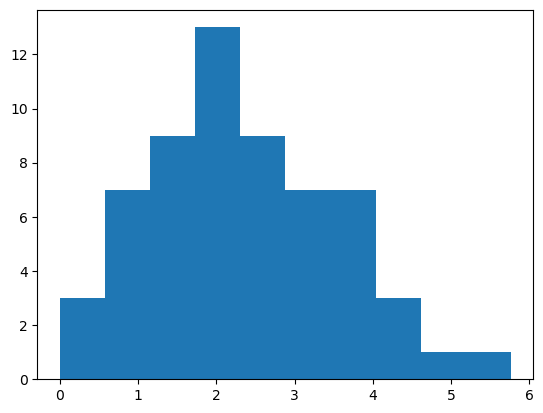

In [43]:
plt.hist(np.log(x))
#przekształcenie logarytmiczne temu w tym wypadku przeciwdziała

In [ ]:
# ma to swoje plusy i minusy 
# wada - tracimy prosta interpretowalnosc

In [45]:
lm2=LinearRegression()
x2 = np.log(x1)
lm2.fit(x2,y)
lm2.score(x2,y)
# o rząd wielkości lepiej

0.08525775254975498

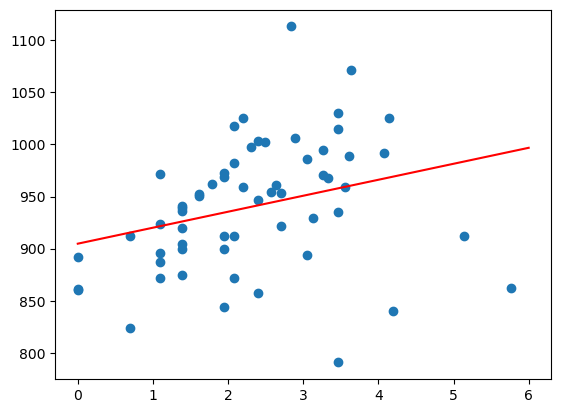

In [46]:
plt.scatter(np.log(x),y)
X_plot = np.linspace(0,6,6)
plt.plot(X_plot,X_plot*lm2.coef_+lm2.intercept_,color = 'red')
plt.show()
#dane są bardziej liniowe

### Metoda Boxa-Coxa

Metoda Boxa-Coxa jest popularnym rozwiązaniem stosowanym do przekształcenia zmiennej. Ważnym założeniem metody jest dodatniość wszystkich wartość.
Metoda przekształca zmienną $z>0 \to t_{\lambda}(z)$, gdzie
$$
    t_{\lambda}(z)=\left.
    \begin{cases}
    \frac{z^{\lambda}-1}{\lambda} \quad &\text{dla} \quad \lambda\neq 0\\
    \log(z) \quad &\text{dla} \quad \lambda= 0.
    \end{cases}\right.
$$

Wybór $\lambda$ odbywa się na podstawie metody największej wiarogodności. Funkcja wiarogodności zakłada normalność błędów i ma następującą postać:
$$
L(\lambda)=-\frac{n}{2}\log\Big(\frac{\text{RRS}_{\lambda}}{n}\Big) + (\lambda-1)\sum\log y_i,
$$
gdzie $\text{RRS}_{\lambda}$, to $\text{RRS}$ dla odpowiedzi $t_{\lambda}(z)$.

## Zadanie 2.1
Znajdź najlepszy parametr $\lambda$ dla przekształcenia zmiennej niezależnej `nox`, przekształć zmienną zgodnie z uzyskaną wartością i dopasuj model prostej regresji liniowej.

In [47]:
#co jeśli nie wiemy jakiej transformacji dokonać, a wiemy, że y>0. Użyjmy przekształcenia Boxa - Coxa
pt = PowerTransformer(method='box-cox',standardize=False)
x1_boxcox = pt.fit_transform(x1)
x1_boxcox

array([[2.37211997],
       [2.05654842],
       [1.64030602],
       [1.87733598],
       [3.04902324],
       [2.92857673],
       [2.92857673],
       [1.29442922],
       [2.20003382],
       [1.76816374],
       [1.87733598],
       [3.39157596],
       [2.78025567],
       [2.62444561],
       [1.97242921],
       [0.        ],
       [1.29442922],
       [1.87733598],
       [2.99164257],
       [1.29442922],
       [0.        ],
       [1.0403737 ],
       [1.0403737 ],
       [1.0403737 ],
       [1.48651425],
       [1.76816374],
       [1.29442922],
       [1.76816374],
       [4.38064402],
       [3.0304675 ],
       [2.50989976],
       [0.        ],
       [2.69122018],
       [2.13188318],
       [2.31932315],
       [1.0403737 ],
       [2.46697555],
       [2.78025567],
       [2.92857673],
       [3.34810048],
       [2.62444561],
       [1.29442922],
       [2.13188318],
       [1.97242921],
       [1.29442922],
       [2.37211997],
       [3.42223521],
       [4.019

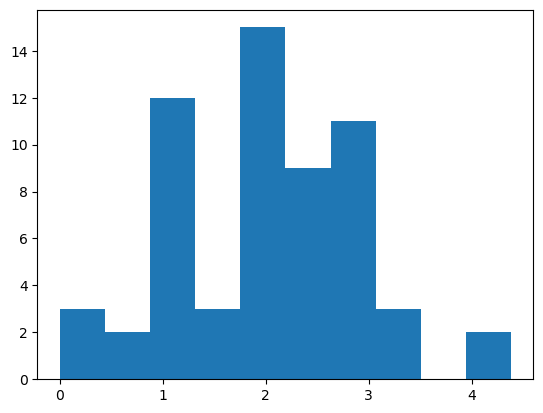

In [48]:
plt.hist(x1_boxcox)
plt.show()
#też poradziło sobie z pojedynczymi obserwacjami o dużych wartościach nox

In [49]:
lm3=LinearRegression()
lm3.fit(x1_boxcox,y)
lm3.score(x1_boxcox,y)

0.10487208939414094

In [ ]:
# wsp. R^2 jest jeszcze wiekszy

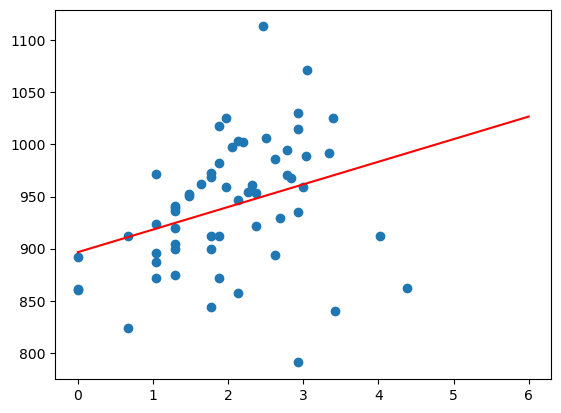

In [50]:
plt.scatter(x1_boxcox,y)
X_plot = np.linspace(0,6,6)
plt.plot(X_plot,X_plot*lm3.coef_+lm3.intercept_,color = 'red')
plt.show()
#dane są bardziej liniowe niż to co było na początku

In [51]:
#Pipeline
#Można połączyć PowerTransformera z LinearRegression
pipeline1 = make_pipeline(PowerTransformer(method='box-cox',standardize=False),LinearRegression())
lm4  = pipeline1.fit(X = x1,y = y)
print(lm4.score(x1,y))
#Aby dojść do parametrów elementu pipelina najpierw bierzemy indeks elementu,
#wywołujemy pipeline z numerem indeksu i po kropce parametr.
print(lm4[1].coef_)
print(lm4[1].intercept_)

0.10487208939414094
[21.68823781]
896.5673932215587


In [ ]:
# Metoda boxa-coxa dziala jedynie na zmiennych ktore maja wartosci dodatnie. 
# To jest glowna wada tej metody
# dla ujemnych trzeba kolejna metode - Yeo-Johnsona

Co w przypadku, gdy zmienna losowa, która chcielibyśmy przekształcić byłaby niedodatnia?

### Metoda Yeo-Johnsona

$$
    t_{\lambda}(z)=\left.
    \begin{cases}
    \frac{(y+1)^{\lambda} -1}{\lambda} \quad &\text{dla} \quad \lambda\neq 0, y\geq 0,\\
    \log(y+1) \quad &\text{dla} \quad \lambda= 0, y\geq0,\\
    -\frac{(-y+1)^{2-\lambda}-1}{2-\lambda} \quad &\text{dla} \quad \lambda\neq 2, y<0,\\
    -\log(-y+1) \quad &\text{dla} \quad \lambda= 2, y<0.
    \end{cases}\right.
$$

In [ ]:
# PowerTransformer(method='yeo-johnson',standardize=False)

# Zmienne kategoryczne

# Zadanie 3
Wczytaj dane `Salaries` z pakieru `carData` i dopasuj model `salary ~ sex`. Zwróć uwagę na kodowanie zmiennej `sex`.

In [52]:
# http://www.sthda.com/english/articles/40-regression-analysis/163-regression-with-categorical-variables-dummy-coding-essentials-in-r/
salaries = sm.datasets.get_rdataset(dataname="Salaries", package="carData")
salaries.data.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [53]:
y = salaries.data['salary']
x = salaries.data['sex']
x1 = np.array(x).reshape(-1,1)

In [55]:
x1
#problem z dopasowaniem
lm1 = LinearRegression()
lm1.fit(x1,y)

ValueError: could not convert string to float: 'Male'

In [56]:
enc = OneHotEncoder()
x1_transform = enc.fit_transform(x1).toarray()

In [57]:
#albo jedna albo druga kolumna do modelu (niosą tą samą informację tylko inaczej poszczególne klasy pooznaczane)
x1_transform

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [59]:
print(x1_transform[:,1].reshape(-1,1))

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.

In [60]:
lm1 = LinearRegression()
lm1.fit(x1_transform[:,1].reshape(-1,1),y)

LinearRegression()

In [61]:
lm1.coef_

array([14088.008738])

In [62]:
lm1.intercept_

101002.41025641026

**Ważne:**

Gdy w danych występują zmienne kategoryczne, jak np. w tym przypadku zmienna `sex`, postępujemy z nią następująco

1. tworzymy, nową zmienną (ang. *dummy variable*), która

    **1**, gdy osoba jest mężczyzną,
    
    **0**, gdy osoba jest kobietą,
    
    
2. zmienna `sex` jest traktowana w równaniu regresji jako:

  $b_0 + b_1$ gdy osoba jest mężczyzną,

  $b_0$ gdy osoba jest kobietą.

teraz zmieniamy poziom referencyjny aby był nim Male wówczas zmienna sex jest traktowana w równaniu regresji jako:\
$c_0$ gdy osoba jest mężczyzną,\
$c_0+ c_1$ gdy osoba jest kobietą.\
Zatem $c_0 = b_0+b_1$ i $c_1 = b_0-c_0 = -b_1$

In [63]:
lm1 = LinearRegression()
lm1.fit(x1_transform[:,0].reshape(-1,1),y)

LinearRegression()

In [64]:
lm1.coef_

array([-14088.008738])

In [65]:
lm1.intercept_

115090.41899441341

In [67]:
14088.008738+101002.41025641026 # dodanie wspolczynnika b0 + b1 dla mezczyzn

115090.41899441027

## Zadanie 3.1
Sprawdź jak została zakodowana zmienna `ShelveLoc` w zbiorze danych `Carseats`. Zmień poziom wartości dla tej zmiennej, sprawdź różnice w modelu.

In [68]:
np.unique(carseats_df.ShelveLoc) #3 poziomy

array(['Bad', 'Good', 'Medium'], dtype=object)

In [69]:
y = carseats_df['Sales']
x = carseats_df['ShelveLoc']
x1 = np.array(x).reshape(-1,1)

In [70]:
enc = OneHotEncoder()
x1_transform = enc.fit_transform(x1).toarray()

In [71]:
x1_transform

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [ ]:
# mozna na jedna kolumna 0,1,2 
# zaleta - jasnosc danych, nie trzeba pamietac co dokladnie niosa
# wady

In [ ]:
# Podejscie 0,1,2
# Bad b0 
# Medium b0+b1
# Good b0 + 2* b1

# Podejscie OneHotEncodingowe
# Bad c0
# Medium c0 + c1
# Good c0 + c2
# Przy tym podejciu mamy bardziej elasyczny model kosztem tego ze musimy wziac dane z dwoch kolumn zamiast z jednej

In [72]:
x1_transform[:, 1:3]

array([[0., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 0.],
       [0., 0.

In [73]:
lm1 = LinearRegression()
lm1.fit(x1_transform[:,0].reshape(-1,1),y)

LinearRegression()